In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import os

In [9]:
df = pd.read_csv('/content/drive/MyDrive/credit_card/creditcard[1].csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [11]:
df = df.sample(frac = 1, random_state = 1)
df = df.reset_index(drop = True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
1,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
2,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
3,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
4,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [12]:
as_np = df.to_numpy()
index = int(len(as_np)* .92)
x_train,y_train = as_np[:index,:-1],as_np[:index,-1]
x_test,y_test = as_np[index:, :-1], as_np[index:, -1]
(x_train.shape, y_train.shape),(x_test.shape, y_test.shape)


(((262022, 30), (262022,)), ((22785, 30), (22785,)))

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train,y_train)
test_predictions = model.predict(x_test)
pd.value_counts(test_predictions)

0.0    22757
1.0       28
dtype: int64

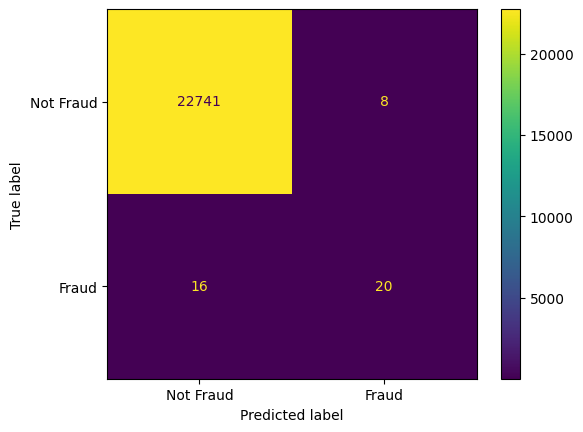

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
 display_labels=['Not Fraud', 'Fraud'])
disp.plot()


In [15]:
tn, fp, fn, tp = cm.ravel()
s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)
print(s)


True Negatives: 22741
False Positives: 8
False Negatives: 16
True Positives: 20



In [20]:
def accuracy(tn, fp, fn, tp):
 return (tp + tn) / (tp + tn + fp + fn)
"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))
{"type":"string"}


{'type': 'string'}

In [21]:
def tpr(tn, fp, fn, tp):
 return tp / (tp + fn)
"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))
{"type":"string"}

{'type': 'string'}

In [22]:
def fnr(tn, fp, fn, tp):
 return fn / (tp + fn)
"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))
{"type":"string"}
"True Positive Rate + False Negative Rate: {0}".format(tpr(tn, fp, fn,
tp) + fnr(tn, fp, fn, tp))
{"type":"string"}

{'type': 'string'}

In [23]:
def tnr(tn, fp, fn, tp):
 return tn / (tn + fp)
"True Negative Rate: {0}".format(tnr(tn, fp, fn, tp))
{"type":"string"}

{'type': 'string'}

In [24]:
def fpr(tn, fp, fn, tp):
 return fp / (tn + fp)
"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))
{"type":"string"}
"True Negative Rate + False Positive Rate: {0}".format(tnr(tn, fp, fn,
tp) + fpr(tn, fp, fn, tp))
{"type":"string"}

{'type': 'string'}

In [25]:
def ppv(tn, fp, fn, tp):
 return tp / (tp + fp)
"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))
{"type":"string"}

{'type': 'string'}

In [26]:
def npv(tn, fp, fn, tp):
 return tn / (tn + fn)
"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))
{"type":"string"}


{'type': 'string'}

In [27]:
def balanced_accuracy(tn, fp, fn, tp):
 tprr = tpr(tn, fp, fn, tp)
 tnrr = tnr(tn, fp, fn, tp)
 return (tprr + tnrr) / 2
"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))
{"type":"string"}

{'type': 'string'}

In [28]:
def f1(tn, fp, fn, tp):
 p = ppv(tn, fp, fn, tp)
 r = tpr(tn, fp, fn, tp)
 return (2*p*r) / (p + r)
"F1 Score: {0}".format(f1(tn, fp, fn, tp))
{"type":"string"}


{'type': 'string'}

In [29]:
probabilities = model.predict_proba(x_test)[:, 1]
probabilities


array([0.00012139, 0.0003532 , 0.00030147, ..., 0.00473659, 0.00017273,
       0.00171865])

In [30]:
pd.value_counts(probabilities > 0.5)


False    22757
True        28
dtype: int64

In [31]:
import numpy as np
thresholds = np.linspace(0, 1, num=2000).astype(np.float64)
thresholds

array([0.00000000e+00, 5.00250125e-04, 1.00050025e-03, ...,
       9.98999500e-01, 9.99499750e-01, 1.00000000e+00])

In [32]:
all_predictions = np.array([(probabilities > t).astype(int) for t in
thresholds])
all_predictions.shape

(2000, 22785)

In [33]:
pd.value_counts(all_predictions[0])

1    22785
dtype: int64

In [34]:
confusion_matrices = [confusion_matrix(y_test, predictions) for
predictions in all_predictions]
tn_fp_fn_tps = [cm.ravel() for cm in confusion_matrices]
tprs = [tpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]
fprs = [fpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]

In [36]:
import plotly.express as px
px.scatter(x=fprs, y=tprs, color=thresholds, labels=dict(x='False Positive Rate', y='True Positive Rate', color='Threshold'), title='ROCCurve')
from sklearn.metrics import auc
auc(fprs, tprs)

0.9810064911278153

In [37]:
from math import sqrt
def mcc(tn, fp, fn, tp):
 top = (tp * tn) - (fp * fn)
 bot = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
 return top / sqrt(bot)
"Matthews Correlation Coefficient: {0}".format(mcc(tn, fp, fn, tp))
{"type":"string"}
y_test.shape, test_predictions.shape, probabilities.shape

((22785,), (22785,), (22785,))

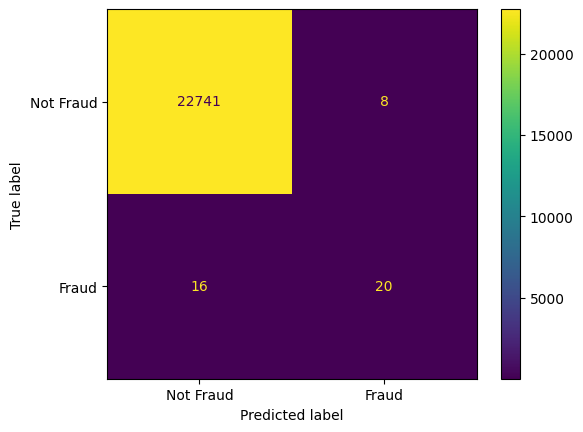

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
 display_labels=['Not Fraud', 'Fraud'])
disp.plot()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions, labels=[0, 1],
target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22749
       Fraud       0.71      0.56      0.63        36

    accuracy                           1.00     22785
   macro avg       0.86      0.78      0.81     22785
weighted avg       1.00      1.00      1.00     22785



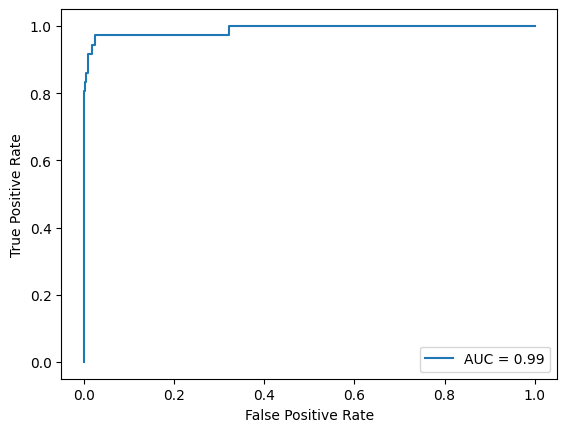

In [40]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, test_predictions)
0.6294313746803477
from sklearn.metrics import RocCurveDisplay, roc_curve
fprs, tprs, thresholdss = roc_curve(y_test, probabilities)
roc_auc = auc(fprs, tprs)
display = RocCurveDisplay(fpr=fprs, tpr=tprs, roc_auc=roc_auc)
display.plot()